<a href="https://colab.research.google.com/github/calmrocks/master-machine-learning-engineer/blob/main/BasicModels/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Linear Regression

## Introduction
Linear regression is one of the fundamental algorithms in machine learning and statistics. It models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data.

### Key Concepts:
- Simple Linear Regression (one feature)
- Multiple Linear Regression (multiple features)
- Model assumptions
- Model evaluation metrics

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## 1. Simple Linear Regression

Simple linear regression involves one independent variable (X) and one dependent variable (y).
The equation takes the form: y = mx + b
- y is the dependent variable
- x is the independent variable
- m is the slope (coefficient)
- b is the y-intercept

Let's create a simple example with synthetic data:

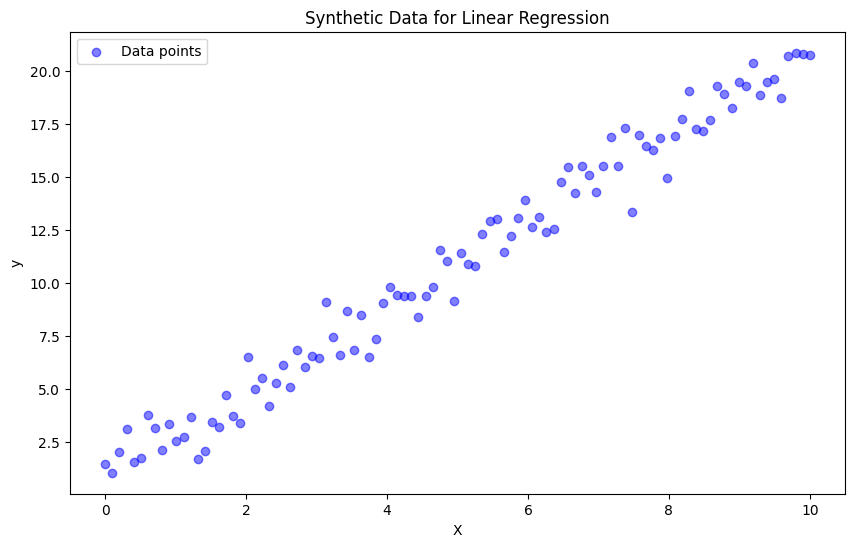

In [2]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + np.random.normal(0, 1, (100, 1))

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data for Linear Regression')
plt.legend()
plt.show()

## 2. Fitting a Simple Linear Regression Model

Now let's fit a linear regression model to our data and visualize the results:

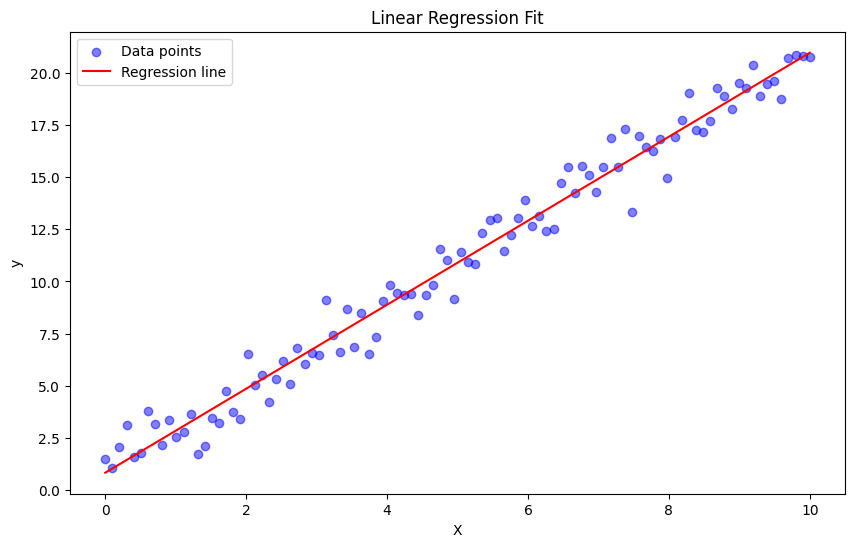

Slope (coefficient): 2.01
Intercept: 0.83


In [3]:
# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

# Print model parameters
print(f"Slope (coefficient): {model.coef_[0][0]:.2f}")
print(f"Intercept: {model.intercept_[0]:.2f}")

## 3. Multiple Linear Regression

Multiple linear regression involves multiple independent variables:
y = b₀ + b₁x₁ + b₂x₂ + ... + bₙxₙ

Let's create an example with multiple features:

In [4]:
# Generate synthetic data with multiple features
np.random.seed(42)
X_multi = np.random.randn(100, 3)  # 3 features
y_multi = 2 * X_multi[:, 0] + 0.5 * X_multi[:, 1] - 1 * X_multi[:, 2] + 3 + np.random.normal(0, 0.5, 100)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Create and fit the model
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Make predictions
y_pred_multi = model_multi.predict(X_test)

# Print coefficients
print("Coefficients:")
for i, coef in enumerate(model_multi.coef_):
    print(f"Feature {i+1}: {coef:.2f}")
print(f"Intercept: {model_multi.intercept_:.2f}")

Coefficients:
Feature 1: 1.95
Feature 2: 0.46
Feature 3: -1.05
Intercept: 3.09


## 4. Model Evaluation

Common metrics for evaluating linear regression models:
1. Mean Squared Error (MSE)
2. R-squared (R²)
3. Adjusted R-squared

Mean Squared Error: 0.12
R-squared Score: 0.96


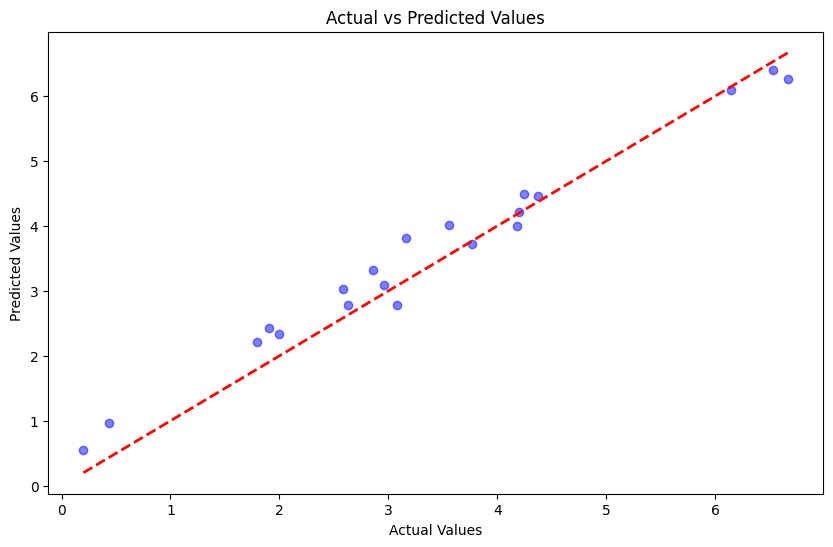

In [5]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_multi)
r2 = r2_score(y_test, y_pred_multi)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multi, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## 5. Real-World Example: Housing Price Prediction

Let's use the Boston Housing dataset as a real-world example:

Mean Squared Error: 0.56
R-squared Score: 0.58


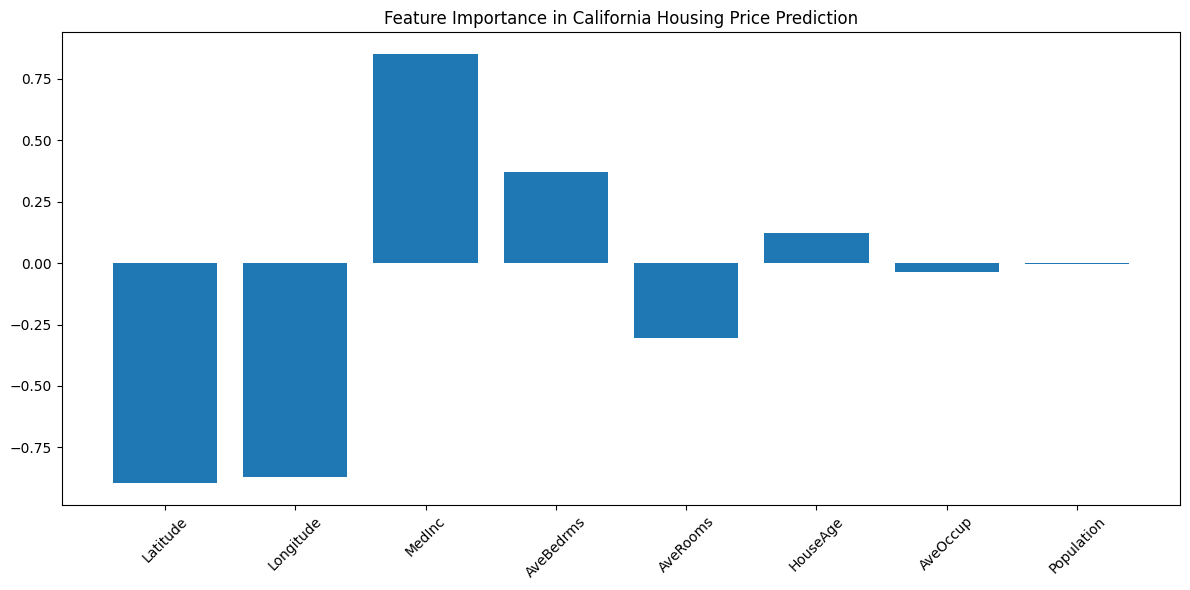

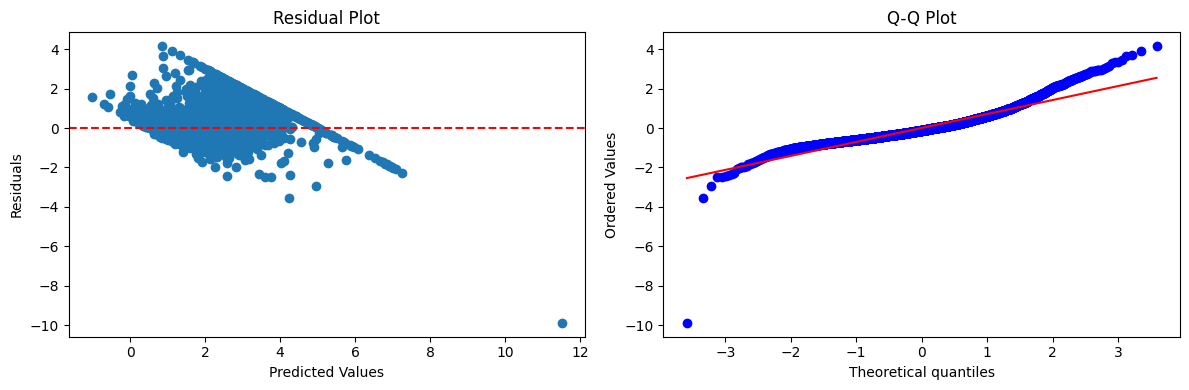


Feature Descriptions:
MedInc: MedInc
HouseAge: HouseAge
AveRooms: AveRooms
AveBedrms: AveBedrms
Population: Population
AveOccup: AveOccup
Latitude: Latitude
Longitude: Longitude


In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the California Housing dataset
housing = fetch_california_housing()
X_housing = housing.data
y_housing = housing.target

# Scale the features
scaler = StandardScaler()
X_housing_scaled = scaler.fit_transform(X_housing)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_housing_scaled, y_housing, test_size=0.2, random_state=42)

# Create and fit the model
model_housing = LinearRegression()
model_housing.fit(X_train, y_train)

# Make predictions
y_pred_housing = model_housing.predict(X_test)

# Evaluate the model
mse_housing = mean_squared_error(y_test, y_pred_housing)
r2_housing = r2_score(y_test, y_pred_housing)

print(f"Mean Squared Error: {mse_housing:.2f}")
print(f"R-squared Score: {r2_housing:.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': housing.feature_names,
    'Coefficient': model_housing.coef_
})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xticks(rotation=45)
plt.title('Feature Importance in California Housing Price Prediction')
plt.tight_layout()
plt.show()

# Plot residuals
residuals = y_test - y_pred_housing

plt.figure(figsize=(12, 4))

# Residual plot
plt.subplot(121)
plt.scatter(y_pred_housing, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')

# Q-Q plot
plt.subplot(122)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

# Print feature names and their descriptions
print("\nFeature Descriptions:")
for name, description in zip(housing.feature_names, housing.feature_names):
    print(f"{name}: {description}")

## 6. Assumptions of Linear Regression

1. Linearity: The relationship between X and y is linear
2. Independence: Observations are independent
3. Homoscedasticity: Constant variance of residuals
4. Normality: Residuals are normally distributed

Let's check these assumptions:

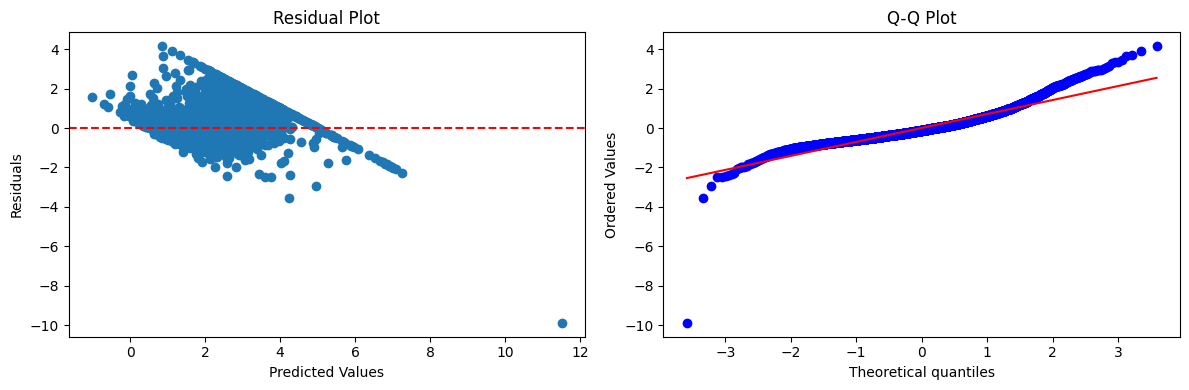

In [9]:
# Calculate residuals
residuals = y_test - y_pred_housing  # Changed from y_pred_boston to y_pred_housing

# Plot residuals
plt.figure(figsize=(12, 4))

# Residual plot
plt.subplot(121)
plt.scatter(y_pred_housing, residuals)  # Changed from y_pred_boston to y_pred_housing
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')

# Q-Q plot
plt.subplot(122)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

## 7. Common Issues and Solutions

1. **Outliers**: Use robust regression or remove outliers
2. **Multicollinearity**: Check correlation between features
3. **Non-linearity**: Transform features or use non-linear models
4. **Heteroscedasticity**: Transform target variable or use weighted regression

## Summary
- Linear regression is a simple but powerful tool for prediction
- Important to check assumptions and validate model performance
- Feature scaling and selection are crucial for good results
- Regular evaluation and monitoring of model performance is necessary